<center> <h1><b>Estrategia: R-cuadrado</b> </h1></center>

Esta estrategia usa el modelo de Fama-French de cuatro factores.

\begin{equation}
    r_i−r_f = β_0+β_1(r_m−r_f)+β_2 SMB+β_3 HML + \epsilon_i
\end{equation}

Donde:

* $r_i$: Es el retorno del i-esimo activo, $i = 1, 2, ..., N.$
* $r_f$: Es la tasa libre de riesgo.
* $r_i − r_f$: Es el retorno en exceso del activo.
* $r_m − r_f$: Es la prima de riesgo de mercado.
* SMB: Es el factor tamaño o small minus big market cap, este factor nos dice que las empresas de menor capitalización de mercado tienen un rendimiento superior que las empresas de mayor capitalización.
* HML: Es el factor valor o high minus low price to book, este factor nos dice que las empresas con un alto ratio price to book tienen un rendimiento superior que las empresas de bajo ratio price to book.
* $\beta_j (j>0)$: Paramétros a ajustar mediante métodos de regresión.
* $\beta_0 = \alpha_i$: interceptos hallados mediante métodos de regresión.
* $\epsilon_i$: Residuo

In [1]:
# # Correr esta celda una sola vez
# !pip install --upgrade version_information
# !pip install pandas_datareader
# !pip install yfinance

In [2]:
import pandas_datareader.data as reader    # Para traer la data directamente de la página de Fama-French
import pandas as pd
import numpy as np
import os
from datetime import date
import yfinance as yf
import version_information
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Nombre de archivos importantes pagina Fama-French 

**3 factor famma french**

- Mensual: 'F-F_Research_Data_Factors'
- Semanal: 'F-F_Research_Data_Factors_weekly'
- Diaria: 'F-F_Research_Data_Factors_daily'

**Momentum factor**

- Mensual: 'F-F_Momentum_Factor'
- Diaria: 'F-F_Momentum_Factor_daily'

### 1. Traer la data (mensual, semanal,...) 
    
Se van a traer tres distintos dataframes: el primero contiene los tres factores originales del modelo de Fama-French, el segundo contiene el cuarto factor (Momento) y el cuarto dataFrame contiene los precios de cierre de los activos que componen el portafolio.

In [3]:
# define paths
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results

# read ETFs list
ETFs = pd.read_excel(path_rsrc + "list_of_ETFs.xlsx")

In [4]:
y_back = 5

end = date.today()
start = date(end.year - y_back, end.month, end.day)

# Tres factores principales de fama-french
ff_df = reader.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0]/100

# factor de momento
ff_MOM_df = reader.DataReader('F-F_Momentum_Factor', 'famafrench', start, end)[0]/100

# acciones
# el mismo que la data ade fama-french
s = ff_df.index[-1]
end1 = date(s.year, s.month, 29)
# un mes atras respecto a la data de fama-french
start1 = date(end.year - y_back, end.month-1, 1)

tickers = ETFs["Financials"].to_list()
precios = yf.download(tickers, start=start1, end=end1, interval="1mo")["Close"]
precios.index = pd.to_datetime(precios.index, format="%Y%m").to_period("M")

[*********************100%%**********************]  25 of 25 completed


In [37]:
end

datetime.date(2023, 12, 6)

In [38]:
end1

datetime.date(2023, 10, 29)

In [39]:
start1

datetime.date(2018, 11, 1)

In [5]:
precios.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-11,16.059999,1083.800049,18.430000,62.840000,410.799988,24.559999,39.200001,30.450001,61.360001,62.590000,...,52.570000,22.129999,61.070000,30.969999,55.759998,27.780001,41.521500,40.980000,67.419998,26.969999
2018-12,14.040000,621.599976,16.950001,44.770000,542.799988,22.090000,34.560001,27.010000,56.029999,57.720001,...,43.980000,19.840000,56.619999,28.370001,46.790001,26.240000,36.349998,32.619999,59.360001,23.820000
2019-01,15.950000,903.000000,18.020000,57.700001,413.200012,25.080000,37.750000,29.870001,60.580002,62.279999,...,49.700001,22.000000,59.869999,30.459999,52.959999,26.889999,40.090000,38.799999,64.949997,25.940001
2019-02,16.450001,1088.000000,18.790001,62.950001,378.000000,26.950001,38.959999,30.959999,61.770000,64.800003,...,51.650002,22.129999,63.369999,31.680000,56.610001,27.690001,41.980000,40.790001,66.970001,26.520000
2019-03,16.360001,795.799988,18.160000,61.860001,378.000000,27.680000,37.520000,30.260000,58.779999,63.619999,...,48.200001,21.700001,61.880001,30.900000,51.340000,27.879999,40.279999,40.049999,64.540001,25.709999


In [6]:
precios.shape

(60, 25)

In [7]:
ff_df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2018-12,-0.0957,-0.0238,-0.0184,0.0020
2019-01,0.0840,0.0290,-0.0046,0.0021
2019-02,0.0340,0.0205,-0.0267,0.0018
2019-03,0.0110,-0.0305,-0.0417,0.0019
2019-04,0.0397,-0.0174,0.0215,0.0021


In [8]:
ff_df.shape

(59, 4)

In [9]:
ff_MOM_df.tail()

,Mom
Date,
2023-06,-0.0237
2023-07,-0.0398
2023-08,0.0377
2023-09,0.0026
2023-10,0.0166


In [10]:
ff_MOM_df.shape

(59, 1)

<h3> 2. Unir Fama-French DataFrames

In [11]:
ff_4f = ff_df.merge(ff_MOM_df, on=ff_df.index)
ff_4f.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom'] 
ff_4f.set_index(["Date"], inplace=True)
ff_4f.tail()

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2023-06,0.0646,0.0154,-0.0026,0.0040,-0.0237
2023-07,0.0321,0.0208,0.0411,0.0045,-0.0398
2023-08,-0.0239,-0.0316,-0.0106,0.0045,0.0377
2023-09,-0.0524,-0.0251,0.0152,0.0043,0.0026
2023-10,-0.0318,-0.0387,0.0019,0.0047,0.0166


In [12]:
ff_4f.describe()

,Mkt-RF,SMB,HML,RF,Mom
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.008105,-0.001934,-0.001759,0.001388,-0.000475
std,0.056610,0.028325,0.047026,0.001473,0.045822
min,-0.133900,-0.059400,-0.138700,0.000000,-0.160100
25%,-0.025800,-0.023600,-0.025200,0.000100,-0.024200
50%,0.014300,-0.002500,-0.004900,0.001200,0.007500
75%,0.042850,0.018650,0.021200,0.002100,0.026700
max,0.136500,0.073600,0.127500,0.004700,0.079700


<h3> 3. Retornos

Al calular los retornos, la primera fila va quedar sin datos que por lo cual que se elimina. Esta es la razón por la que se descargo la data de los precios de cierre con una fecha demás respecto al dataframe de Fama-French. Luego, ajustamos los retornos de los precios con la columna "RF" de Fama-French, para asi obtener el retorno en exceso para cada activo.

In [13]:
retornos = precios.pct_change()
retornos.dropna(inplace=True)
retornos.tail()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2023-06,0.044898,0.121784,0.020756,0.181784,-0.174804,0.063614,0.064932,0.068594,0.040830,0.065721,...,0.046126,0.099930,0.038305,0.071841,0.047729,0.018032,0.067819,0.126698,0.062794,0.061398
2023-07,0.027344,0.640281,0.046924,0.138566,-0.125198,0.120072,0.059698,0.100531,0.078017,0.034020,...,0.115956,0.051184,0.028708,0.039139,0.192505,0.027920,0.000000,0.088777,0.060192,0.048057
2023-08,-0.000634,-0.253805,-0.042331,-0.090758,0.097222,-0.121764,-0.031676,-0.046758,-0.033732,0.002311,...,-0.084043,-0.027389,-0.016744,0.001412,-0.084822,-0.044977,0.000000,-0.056573,-0.030535,-0.026889
2023-09,0.016487,-0.180568,-0.016641,-0.107110,0.100715,-0.072317,-0.036025,-0.043489,-0.037025,0.006148,...,-0.045043,-0.049437,0.015821,0.000000,-0.062612,-0.047095,0.000000,-0.069356,-0.038084,-0.035195
2023-10,-0.072364,-0.174627,-0.038604,-0.090522,0.082000,-0.071003,-0.028995,-0.043616,-0.040975,0.026514,...,-0.054155,-0.112574,0.042325,0.003996,-0.050275,0.003851,0.000000,-0.058244,-0.029009,-0.024420


In [14]:
ret_rf = pd.DataFrame(retornos.values - ff_4f[["RF"]].values, columns= retornos.columns, index=retornos.index)
ret_rf.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-12,-0.127778,-0.428462,-0.082304,-0.289556,0.319324,-0.102570,-0.120367,-0.114972,-0.088864,-0.079808,...,-0.165401,-0.105479,-0.074867,-0.085952,-0.162868,-0.057436,-0.126550,-0.206002,-0.121549,-0.118796
2019-01,0.133940,0.450603,0.061027,0.286709,-0.240862,0.133255,0.090203,0.103787,0.079107,0.076902,...,0.127959,0.106771,0.055300,0.071569,0.129766,0.022671,0.100789,0.187354,0.092071,0.086901
2019-02,0.029548,0.203073,0.040930,0.089188,-0.086989,0.072761,0.030253,0.034691,0.017843,0.038662,...,0.037435,0.004109,0.056660,0.038253,0.067120,0.027951,0.045344,0.049489,0.029301,0.020559
2019-03,-0.007371,-0.270466,-0.035429,-0.019215,-0.001900,0.025187,-0.038861,-0.024510,-0.050305,-0.020110,...,-0.068696,-0.021331,-0.025413,-0.026521,-0.094993,0.004962,-0.042395,-0.020042,-0.038185,-0.032443
2019-04,0.010736,0.268068,0.075543,0.196251,-0.171412,0.040530,0.084254,0.057715,0.083814,0.071619,...,0.090639,0.024628,0.064480,0.073952,0.084772,0.019421,0.085040,0.128736,0.083428,0.087748


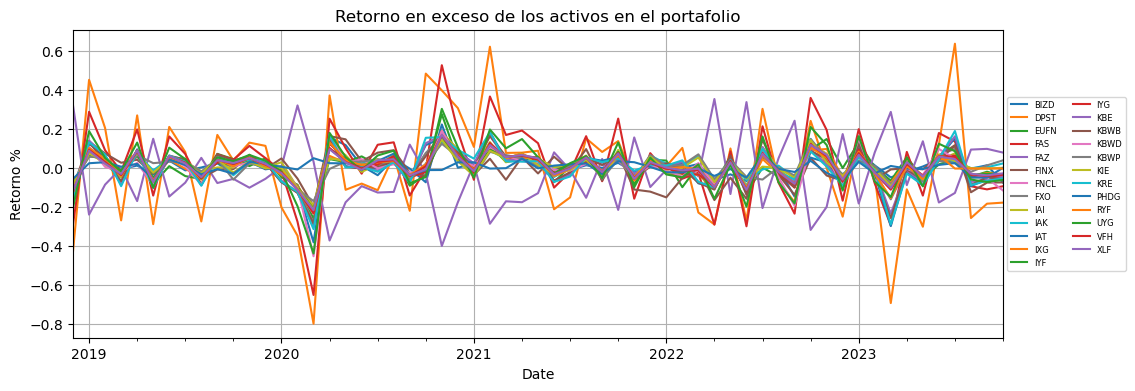

In [15]:
ax = ret_rf.plot(figsize=(12, 4), title="Retorno en exceso de los activos en el portafolio", ylabel="Retorno %")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=2, fontsize=6)
plt.grid()
plt.show()

<h3> 4. Implementar modelo

Primero se reescribe la ecuación a ajustar en forma matricial (debido a que es mucho más eficiente programar operaciones matriciales, que en su lugar, por ejemplo ejecutar todo mediante un ciclo for para através de cada activo en el portafolio). Para ello, se suponen $N$ activos y que el retorno en exceso $R_i, i=1,2,...,N$ viene dado por:

$$R_i = \alpha_i + \sum_{k=1}^{4} β_{i,k} F_k $$

En forma matricial para todos los activos, se tiene la siguiente forma:

$$R = \alpha + BF + \epsilon $$

\begin{equation}
    R =  
    \begin{bmatrix}
        R_1 \\
        R_2 \\
        \vdots\\
        R_N 
    \end{bmatrix},\quad
    \alpha =  
    \begin{bmatrix}
        \alpha_1 \\
        \alpha_2 \\
        \vdots\\
        \alpha_N 
    \end{bmatrix}, \quad
    B =
    \begin{bmatrix}
        \beta_{1,1} & \beta_{1,2} & \beta_{1,3} & \beta_{1,4}\\
        \beta_{2,1} & \beta_{2,2} & \beta_{2,3} & \beta_{2,4}\\
        \vdots      & \vdots      & \vdots & \vdots     \\
        \beta_{N,1} & \beta_{N,2} & \beta_{N,3} &\beta_{N,4}
    \end{bmatrix}, \quad
    F =  
    \begin{bmatrix}
        r_m - r_f \\
        SMB       \\
        HML       \\
        Mom 
    \end{bmatrix}.
\end{equation}

\begin{equation}
\end{equation}

In [16]:
from sklearn.linear_model import LinearRegression
from scipy import stats

In [17]:
# usando sklearn
X = ff_4f[['Mkt-RF', 'SMB', 'HML','Mom']].values
y = ret_rf.values

lr = LinearRegression()
lr.fit(X, y)
B = np.matrix(lr.coef_)
alpha = lr.intercept_

# Coefficient of determination
r_sq = lr.score(X, y)

In [18]:
r_sq

0.825942847343139

In [19]:
B = pd.DataFrame(B, index=precios.columns, columns=['Mkt-RF', 'SMB', 'HML','Mom'])
alpha = pd.DataFrame(alpha, index=precios.columns, columns=["Alpha"])
regresion_df = pd.concat([alpha, B], axis=1)

In [20]:
ret_rf.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-12,-0.127778,-0.428462,-0.082304,-0.289556,0.319324,-0.102570,-0.120367,-0.114972,-0.088864,-0.079808,...,-0.165401,-0.105479,-0.074867,-0.085952,-0.162868,-0.057436,-0.126550,-0.206002,-0.121549,-0.118796
2019-01,0.133940,0.450603,0.061027,0.286709,-0.240862,0.133255,0.090203,0.103787,0.079107,0.076902,...,0.127959,0.106771,0.055300,0.071569,0.129766,0.022671,0.100789,0.187354,0.092071,0.086901
2019-02,0.029548,0.203073,0.040930,0.089188,-0.086989,0.072761,0.030253,0.034691,0.017843,0.038662,...,0.037435,0.004109,0.056660,0.038253,0.067120,0.027951,0.045344,0.049489,0.029301,0.020559
2019-03,-0.007371,-0.270466,-0.035429,-0.019215,-0.001900,0.025187,-0.038861,-0.024510,-0.050305,-0.020110,...,-0.068696,-0.021331,-0.025413,-0.026521,-0.094993,0.004962,-0.042395,-0.020042,-0.038185,-0.032443
2019-04,0.010736,0.268068,0.075543,0.196251,-0.171412,0.040530,0.084254,0.057715,0.083814,0.071619,...,0.090639,0.024628,0.064480,0.073952,0.084772,0.019421,0.085040,0.128736,0.083428,0.087748


In [21]:
regresion_df

,Alpha,Mkt-RF,SMB,HML,Mom
BIZD,-0.005413,0.966208,0.411861,0.452557,-0.177080
DPST,-0.011813,2.171934,3.500169,2.996778,-0.546342
EUFN,-0.004795,0.852734,-0.167133,0.635134,-0.443335
FAS,-0.001854,2.878329,0.316607,1.572973,-0.095765
FAZ,-0.015371,-2.573426,0.056461,-0.882305,-0.061697
FINX,-0.011648,1.274400,0.655277,-0.315231,0.045313
FNCL,-0.003076,0.994316,0.196458,0.604392,-0.066209
FXO,-0.000896,0.986018,0.585304,0.735286,-0.033191
IAI,0.000076,1.013967,0.279140,0.416799,0.027025
IAK,0.002072,0.798478,-0.021090,0.651163,0.092021


### 4.1 Calculo R cuadrado

Ahora se calculan los $R^{2}$ para los valores $\alpha$ estimados. Este se calculara a partir de las siguientes cantidades:

1. Promedio de el exceso de los retornos $\overline{R}(t).$
2. Suma de cuadrados $SS_{tot}.$
3. Suma de cuadrados residual $SS_{res}.$
4. $R^{2}$ de la regresión.

1. Comenzando por el promedio de los retornos (siguiendo la siguiente definición)
$$ \overline{R}_i = \frac{1}{T} \sum_{t=1}^{T} R_{i,t}$$

\begin{equation}
\end{equation}

In [22]:
# retorno medio
retorno_medio = ret_rf.mean(axis=0)
retorno_medio

BIZD    0.000910
DPST   -0.005991
EUFN    0.001532
FAS     0.018141
FAZ    -0.034756
FINX   -0.002053
FNCL    0.003571
FXO     0.004686
IAI     0.007009
IAK     0.007395
IAT    -0.003373
IXG     0.002122
IYF     0.004111
IYG     0.003865
KBE    -0.000781
KBWB   -0.002447
KBWD   -0.004656
KBWP    0.006330
KIE     0.005865
KRE    -0.002071
PHDG    0.001103
RYF     0.004873
UYG     0.007228
VFH     0.003608
XLF     0.004093
dtype: float64

2. Ahora, el calculo de la suma de cuadrados $SS_{tot}$:

$$SS_{tot_{i}} = \sum_{t=1}^{T} \big(R_{i,t} - \overline{R}_{i}\big)^2$$

\begin{equation}
\end{equation}

In [23]:
# suma de cuadrados
ss_tot = (ret_rf - retorno_medio).apply(lambda x: x**2).sum()
ss_tot

BIZD    0.380630
DPST    4.530152
EUFN    0.368817
FAS     2.294950
FAZ     1.753142
FINX    0.460476
FNCL    0.291484
FXO     0.355613
IAI     0.284548
IAK     0.212147
IAT     0.534540
IXG     0.250693
IYF     0.244421
IYG     0.318849
KBE     0.501449
KBWB    0.500379
KBWD    0.513541
KBWP    0.183114
KIE     0.205984
KRE     0.565098
PHDG    0.057367
RYF     0.296376
UYG     0.939132
VFH     0.290308
XLF     0.276454
dtype: float64

3. Luego, se calcula la suma de los cuadrados 

$$SS_{res_{i}} = \sum_{t=1}^{T} \epsilon_{i,t}^{2}$$

\begin{equation}
    \epsilon_{i}(t) = R_{i} - β_1[r_m−r_f](t) - β_2 SMB(t) - β_3 HML(t)
\end{equation}

Empezando por los valores de los residuos, se tiene que en forma matricial, la anterior ecuación puede ser reescrita como:

\begin{equation}
    \epsilon = R - BF
\end{equation}

\begin{equation}
    \epsilon =  
    \begin{bmatrix}
        \epsilon_1 \\
        \epsilon_2 \\
        \vdots\\
        \epsilon_N 
    \end{bmatrix}, \quad
        R =  
    \begin{bmatrix}
        R_1 \\
        R_2 \\
        \vdots\\
        R_N 
    \end{bmatrix},\quad
    B =
    \begin{bmatrix}
        \beta_{1,1} & \beta_{1,2} & \beta_{1,3} & \beta_{1,4}\\
        \beta_{2,1} & \beta_{2,2} & \beta_{2,3} & \beta_{2,4}\\
        \vdots      & \vdots      & \vdots & \vdots     \\
        \beta_{N,1} & \beta_{N,2} & \beta_{N,3} &\beta_{N,4}
    \end{bmatrix}, \quad
    F =  
    \begin{bmatrix}
        r_m - r_f \\
        SMB       \\
        HML       \\
        Mom 
    \end{bmatrix}.
\end{equation}

\begin{equation}
\end{equation}

* F -----> X,  fama-franch factors (defined previously).
* B -----> coefficients matrix.
* R -----> y, returns vector.

Primero calculamos los valores de  epsilón:

In [24]:
F = ff_4f[["Mkt-RF", "SMB", "HML", "Mom"]]
epsilon = pd.DataFrame().reindex_like(ret_rf)
raw_shape = len(ret_rf.columns)
for i in range(len(ret_rf)):
    cache = (ret_rf.iloc[i].values.reshape(raw_shape, 1) - B @ F.iloc[i].values.reshape(4, 1)).values.reshape(raw_shape)
    epsilon.iloc[i] = cache

In [25]:
epsilon.head()

,BIZD,DPST,EUFN,FAS,FAZ,FINX,FNCL,FXO,IAI,IAK,...,KBWB,KBWD,KBWP,KIE,KRE,PHDG,RYF,UYG,VFH,XLF
Date,,,,,,,,,,,,,,,,,,,,,
2018-12,-0.013447,-0.070636,0.016366,0.024399,0.059459,0.028229,-0.008018,0.007550,0.021915,0.006144,...,-0.034343,0.036917,-0.006790,0.001758,-0.028214,-0.024709,-0.016823,-0.003183,-0.009368,-0.009864
2019-01,0.027546,0.133018,-0.041316,0.034672,-0.035745,0.009686,-0.001983,0.004489,-0.009899,0.021424,...,0.011353,-0.025446,0.013691,0.008490,0.019189,-0.003500,0.011143,0.015138,-0.000255,-0.001373
2019-02,0.001860,0.142186,0.036134,0.027656,-0.023677,0.007192,0.009125,0.009086,-0.011458,0.028541,...,0.017340,-0.026422,0.051285,0.024168,0.040489,0.010799,0.024122,0.008169,0.008077,0.001167
2019-03,0.017347,-0.050563,-0.013623,0.026489,-0.007299,0.017008,-0.017140,0.013891,-0.036162,-0.004417,...,-0.013239,0.012866,-0.012874,-0.012616,-0.017775,-0.007504,-0.018033,-0.002322,-0.017111,-0.015655
2019-04,-0.035445,0.162088,0.011959,0.050827,-0.051128,0.009461,0.033237,0.011960,0.040258,0.028285,...,0.037819,-0.035796,0.027658,0.031766,0.048415,0.008708,0.037397,0.029320,0.032299,0.035311


Ahora, se procede con el calculo de los valores de $SS_{res_{i}}:$

In [26]:
ss_res = epsilon.apply(lambda x: x**2).sum(axis=0)
ss_res.head()

BIZD    0.102368
DPST    0.891246
EUFN    0.088863
FAS     0.251969
FAZ     0.439603
dtype: float64

4. Y, finalmente el termino $R^{2}_{i}$ como sigue:

\begin{equation}
    R^{2}_{i} = 1 - \frac{SS_{res_{i}}}{SS_{tot_{i}}}
\end{equation}

\begin{equation}
\end{equation}

In [27]:
R_squared = 1 - (ss_res / ss_tot)
R_squared

BIZD    0.731056
DPST    0.803264
EUFN    0.759060
FAS     0.890207
FAZ     0.749248
FINX    0.788323
FNCL    0.917723
FXO     0.907256
IAI     0.830292
IAK     0.779845
IAT     0.818998
IXG     0.900037
IYF     0.902819
IYG     0.905881
KBE     0.868383
KBWB    0.855150
KBWD    0.853904
KBWP    0.605117
KIE     0.790323
KRE     0.839829
PHDG    0.450768
RYF     0.861017
UYG     0.916181
VFH     0.917434
XLF     0.912501
dtype: float64

In [28]:
regresion_df["R2"] = R_squared

Se actualiza ahora la tabla de valores de los coeficientes con los valores hallados para $R^2$.

In [29]:
regresion_df = regresion_df[["Mkt-RF", "SMB", "HML", "Mom", "Alpha", "R2"]]
regresion_df

,Mkt-RF,SMB,HML,Mom,Alpha,R2
BIZD,0.966208,0.411861,0.452557,-0.177080,-0.005413,0.731056
DPST,2.171934,3.500169,2.996778,-0.546342,-0.011813,0.803264
EUFN,0.852734,-0.167133,0.635134,-0.443335,-0.004795,0.759060
FAS,2.878329,0.316607,1.572973,-0.095765,-0.001854,0.890207
FAZ,-2.573426,0.056461,-0.882305,-0.061697,-0.015371,0.749248
FINX,1.274400,0.655277,-0.315231,0.045313,-0.011648,0.788323
FNCL,0.994316,0.196458,0.604392,-0.066209,-0.003076,0.917723
FXO,0.986018,0.585304,0.735286,-0.033191,-0.000896,0.907256
IAI,1.013967,0.279140,0.416799,0.027025,0.000076,0.830292
IAK,0.798478,-0.021090,0.651163,0.092021,0.002072,0.779845


## 5. Estrategía

La organización previa a la estrategia consiste en lo siguiente:
1. Ordenar los ETFs en quintiles según el $R^2$.
2. Luego ordenar los ETFs en cada uno de tales quintiles según el alfa.
3. Estrategia:
    * Comprar ETFs en el grupo correspondiente al quintil $R^2$ más bajo y en el subquintil con alfa más alto.
    * Vender ETFs en el grupo correspondiente al quintil $R^2$ más alto y el subquintil con alfa más bajo.

In [30]:
# quintiles based on r2 value
r2_quintile = pd.DataFrame(pd.qcut(regresion_df["R2"], 5, labels=False),)
r2_quintile.columns = ["Quintil R2"]
r2_quintile

,Quintil R2
BIZD,0
DPST,1
EUFN,0
FAS,3
FAZ,0
FINX,1
FNCL,4
FXO,4
IAI,2
IAK,1


In [31]:
Quintil_R2 = pd.concat([regresion_df[["R2", "Alpha"]].sort_values(ascending=False, by="R2"), r2_quintile], axis=1, )
Quintil_R2

,R2,Alpha,Quintil R2
FNCL,0.917723,-0.003076,4
VFH,0.917434,-0.003091,4
UYG,0.916181,-0.006936,4
XLF,0.912501,-0.002839,4
FXO,0.907256,-0.000896,4
IYG,0.905881,-0.003565,3
IYF,0.902819,-0.002909,3
IXG,0.900037,-0.003988,3
FAS,0.890207,-0.001854,3
KBE,0.868383,-0.004488,3


In [32]:
quintil_alpha = Quintil_R2.groupby("Quintil R2", group_keys=False)["Alpha"].apply(lambda x: pd.qcut(x, q=5, labels=False))
quintil_alpha.name = "Quintil Alpha"

In [33]:
estrategia_df = pd.concat([Quintil_R2, quintil_alpha], axis=1)
estrategia_df.head()

,R2,Alpha,Quintil R2,Quintil Alpha
FNCL,0.917723,-0.003076,4,2
VFH,0.917434,-0.003091,4,1
UYG,0.916181,-0.006936,4,0
XLF,0.912501,-0.002839,4,3
FXO,0.907256,-0.000896,4,4


In [34]:
estrategia_df["Recommendation"] = np.where((estrategia_df["Quintil R2"] == 0) &
                                          (estrategia_df["Quintil Alpha"] == 4),
                                           "BUY", 0)
estrategia_df["Recommendation"] = np.where((estrategia_df["Quintil R2"] == 4) &
                                          (estrategia_df["Quintil Alpha"] == 0),
                                           "SELL", estrategia_df["Recommendation"])

In [35]:
estrategia_df[estrategia_df["Recommendation"] != "0"]

,R2,Alpha,Quintil R2,Quintil Alpha,Recommendation
UYG,0.916181,-0.006936,4,0,SELL
KBWP,0.605117,0.002029,0,4,BUY


In [36]:
%load_ext version_information
%version_information numpy, scipy, pandas, sklearn

Software versions
Python 3.11.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.15.0
OS Windows 10 10.0.22621 SP0
numpy 1.24.3
scipy 1.11.1
pandas 2.0.3
sklearn 1.3.0
Wed Dec 06 11:27:43 2023 Hora est. Pacífico, Sudamérica